In [8]:
from sklearn import cluster
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.metrics import silhouette_score
import pickle

In [9]:
G = nx.Graph()
data = open("facebookNet.txt","r")
lines=data.readlines()
for line in lines:
    line_split=line.split(" ")
    G.add_edge(int(line_split[0]),int(line_split[1]))



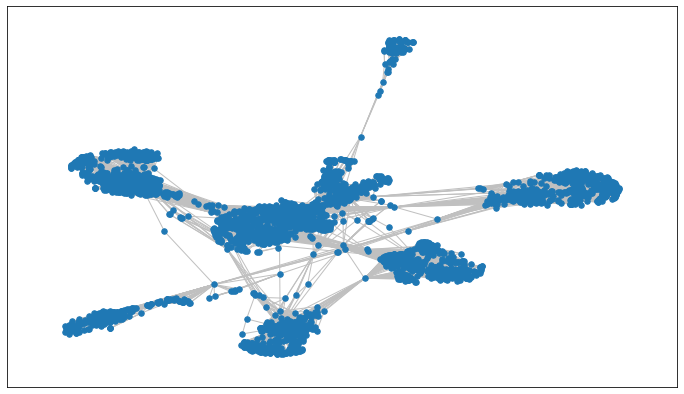

In [9]:
plt.figure(figsize=(12,7))
nx.draw_networkx(G,with_labels=False,node_size=30,edge_color='silver')

# Adjacency matrix

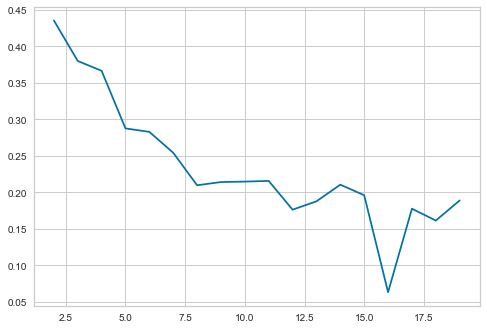

In [14]:
X=nx.to_numpy_array(G, nodelist=[i for i in range(4039)])
s_score = []
for i in range(2,20):
    km = KMeans(n_clusters = i , n_init = 1000)
    km.fit_predict(X)
    # Calculate Silhoutte Score
    score = silhouette_score(X, km.labels_)
    s_score.append(score)
  
fig, ax = plt.subplots()

ax.plot([i for i in range(2,20)], s_score)

In [25]:
k=2
kmeanModel = KMeans(n_clusters=k)
kmeanModel.fit(X)

KMeans(n_clusters=2)

In [26]:
Nodes = pd.DataFrame([i for i in range(4039)], columns = ['Node'])
Clusters = pd.DataFrame(kmeanModel.labels_, columns = ['Cluster'])
nodeByCluster = pd.concat([Nodes, Clusters], axis = 1)
nodeByCluster

,Node,Cluster
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
4034,4034,0
4035,4035,0
4036,4036,0
4037,4037,0


In [27]:
gk = nodeByCluster.groupby('Cluster')
gk.first()

,Node
Cluster,
0,0
1,1912


In [28]:
community = []
for i in range(k):
    community.append(gk.get_group(i)['Node'].tolist())


In [29]:
        
with open('networkShape.pkl', 'rb') as f:
    pos = pickle.load(f)

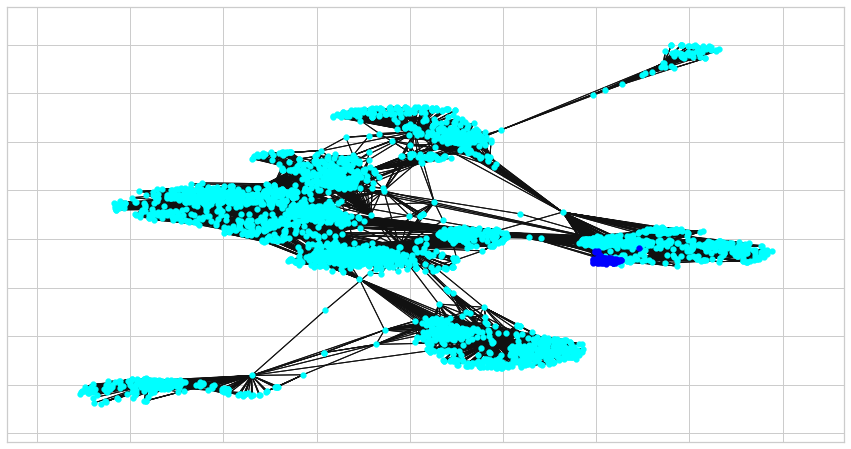

In [31]:
colors=['aqua','blue','yellow','green','lightblue','brown','grey','purple','pink','orange','silver','gold','red','maroon']
plt.figure(figsize=(15,8))
for i in range(k):
    nx.draw_networkx(G, pos=pos, nodelist=community[i], node_color= colors[i],with_labels=False,node_size=35)

# Centrality measures

In [15]:
table = pd.read_csv("Data/nodesByCentralityMeasures.csv")
trainingData = table[["DC","BC","CC","EC"]]
trainingData

,DC,BC,CC,EC
0,0.085934,1.463059e-01,0.353343,3.391796e-05
1,0.004210,2.783274e-06,0.261376,6.045346e-07
2,0.002476,7.595021e-08,0.261258,2.233461e-07
3,0.004210,1.685066e-06,0.261376,6.635648e-07
4,0.002476,1.840332e-07,0.261258,2.236416e-07
...,...,...,...,...
4034,0.000495,0.000000e+00,0.183989,2.951270e-10
4035,0.000248,0.000000e+00,0.183980,2.912901e-10
4036,0.000495,0.000000e+00,0.183989,2.931223e-10
4037,0.000991,7.156847e-08,0.184005,2.989233e-10


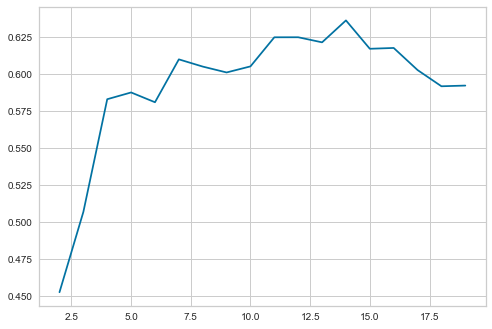

In [16]:
s_score = []
for i in range(2,20):
    km = KMeans(n_clusters = i , n_init = 1000)
    km.fit_predict(trainingData)
    # Calculate Silhoutte Score
    score = silhouette_score(trainingData, km.labels_)
    s_score.append(score)
  
fig, ax = plt.subplots()

ax.plot([i for i in range(2,20)], s_score)

In [17]:
k=14
kmeanModel = KMeans(n_clusters=k)
kmeanModel.fit(trainingData)

KMeans(n_clusters=14)

In [18]:
Nodes = pd.DataFrame([i for i in G], columns = ['Node'])
Clusters = pd.DataFrame(kmeanModel.labels_, columns = ['Cluster'])
nodeByCluster = pd.concat([Nodes, Clusters], axis = 1)
nodeByCluster

,Node,Cluster
0,0,12
1,1,6
2,2,6
3,3,6
4,4,6
...,...,...
4034,4034,4
4035,4035,4
4036,4036,4
4037,4037,4


In [19]:
gk = nodeByCluster.groupby('Cluster')
gk.first()

,Node
Cluster,
0,7
1,865
2,1925
3,363
4,687
5,1684
6,1
7,34
8,107


In [20]:
community = []
for i in range(k):
    community.append(gk.get_group(i)['Node'].tolist())


In [21]:
with open('networkShape.pkl', 'rb') as f:
    pos = pickle.load(f)

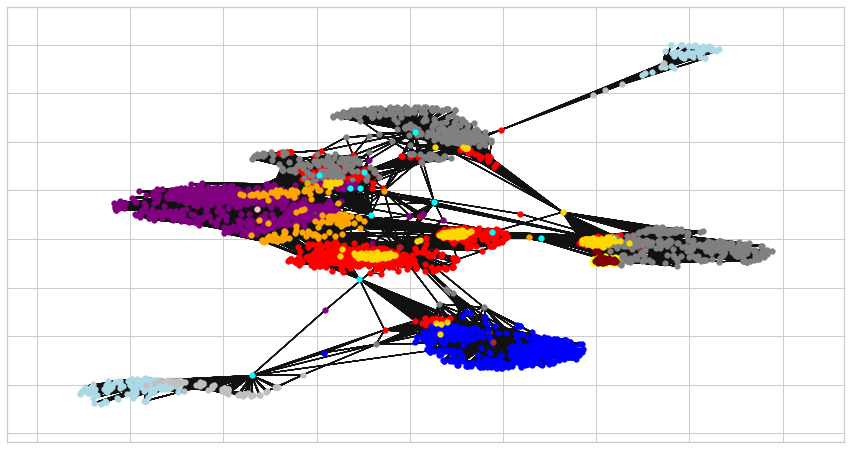

In [24]:
colors=['red','blue','yellow','green','lightblue','brown','grey','purple','pink','orange','silver','gold','aqua','maroon']
plt.figure(figsize=(15,8))
for i in range(k):
    nx.draw_networkx(G, pos=pos, nodelist=community[i], node_color= colors[i],with_labels=False,node_size=35)